In [2]:
#importing liberaries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
import os
import glob as gb
import cv2
import tensorflow as tf
import keras

In [3]:
#data path
trainpath = '../input/intel-image-classification/seg_train/'
testpath = '../input/intel-image-classification/seg_test/'
predpath = '../input/intel-image-classification/seg_pred/'

In [4]:
#training data informations 
Folder_name=[]
folder_item_numbers = []
for folder in  os.listdir(trainpath + 'seg_train') : 
    files = gb.glob(pathname= str( trainpath +'seg_train//' + folder + '/*.jpg'))
    Folder_name.append(folder)
    folder_item_numbers.append(len(files))
foldernames=pd.DataFrame({'Folder_name':Folder_name})
itemnumbers=pd.DataFrame({'Traning Image Numbers':folder_item_numbers})
informations=pd.concat([foldernames,itemnumbers],axis=1)
print(informations)


  Folder_name  Traning Image Numbers
0   buildings                   2191
1     glacier                   2404
2         sea                   2274
3    mountain                   2512
4      forest                   2271
5      street                   2382


In [5]:
#test data informations 
Folder_name=[]
folder_item_numbers = []
for folder in  os.listdir(testpath + 'seg_test') : 
    files = gb.glob(pathname= str( testpath +'seg_test//' + folder + '/*.jpg'))
    Folder_name.append(folder)
    folder_item_numbers.append(len(files))
foldernames=pd.DataFrame({'Folder_name':Folder_name})
itemnumbers=pd.DataFrame({' Test Image Numbers':folder_item_numbers})
informations=pd.concat([foldernames,itemnumbers],axis=1)
print(informations)

  Folder_name   Test Image Numbers
0   buildings                  437
1     glacier                  553
2         sea                  510
3    mountain                  525
4      forest                  474
5      street                  501


In [6]:
#prediction data informations 
Folder_name=[]
folder_item_numbers = []
for folder in  os.listdir(predpath) : 
    files = gb.glob(pathname= str( predpath + folder + '/*.jpg'))
    Folder_name.append(folder)
    folder_item_numbers.append(len(files))
foldernames=pd.DataFrame({'Folder_name':Folder_name})
itemnumbers=pd.DataFrame({' pred Image Numbers':folder_item_numbers})
informations=pd.concat([foldernames,itemnumbers],axis=1)
print(informations)

  Folder_name   pred Image Numbers
0    seg_pred                 7301


In [7]:
#checking image size for traning data
Image_size = []
for folder in  os.listdir(trainpath +'seg_train') : 
    files = gb.glob(pathname= str( trainpath +'seg_train//' + folder + '/*.jpg'))
    for image in files: 
        read_image = plt.imread(image)
        Image_size.append(read_image.shape)
pd.Series(Image_size).value_counts()

(150, 150, 3)    13986
(113, 150, 3)        7
(135, 150, 3)        3
(111, 150, 3)        3
(123, 150, 3)        2
(142, 150, 3)        2
(144, 150, 3)        2
(108, 150, 3)        2
(134, 150, 3)        2
(146, 150, 3)        2
(143, 150, 3)        2
(136, 150, 3)        2
(119, 150, 3)        1
(133, 150, 3)        1
(100, 150, 3)        1
(140, 150, 3)        1
(131, 150, 3)        1
(149, 150, 3)        1
(105, 150, 3)        1
(141, 150, 3)        1
(115, 150, 3)        1
(76, 150, 3)         1
(110, 150, 3)        1
(120, 150, 3)        1
(147, 150, 3)        1
(102, 150, 3)        1
(103, 150, 3)        1
(145, 150, 3)        1
(81, 150, 3)         1
(124, 150, 3)        1
(97, 150, 3)         1
dtype: int64

In [8]:
#checking image size for test data
Image_size = []
for folder in  os.listdir(testpath +'seg_test') : 
    files = gb.glob(pathname= str( testpath +'seg_test//' + folder + '/*.jpg'))
    for image in files: 
        read_image = plt.imread(image)
        Image_size.append(read_image.shape)
pd.Series(Image_size).value_counts()

(150, 150, 3)    2993
(72, 150, 3)        1
(110, 150, 3)       1
(76, 150, 3)        1
(141, 150, 3)       1
(81, 150, 3)        1
(149, 150, 3)       1
(131, 150, 3)       1
dtype: int64

In [9]:
#checking image size for pred data
Image_size = []
for folder in  os.listdir(predpath) : 
    files = gb.glob(pathname= str( predpath + folder + '/*.jpg'))
    for image in files: 
        read_image = plt.imread(image)
        Image_size.append(read_image.shape)
pd.Series(Image_size).value_counts()

(150, 150, 3)    7288
(100, 150, 3)       1
(124, 150, 3)       1
(133, 150, 3)       1
(139, 150, 3)       1
(112, 150, 3)       1
(129, 150, 3)       1
(374, 500, 3)       1
(144, 150, 3)       1
(108, 150, 3)       1
(126, 150, 3)       1
(143, 150, 3)       1
(149, 150, 3)       1
(131, 150, 3)       1
dtype: int64

In [10]:
#resize each image in all folders
#identifing new size as 100 
#converting images to an array as X_train and and making a labeling array for it as y_train
new_size=100    
X_train = []
y_train = []
for folder in  os.listdir(trainpath +'seg_train') : 
    files = gb.glob(pathname= str( trainpath +'seg_train//' + folder + '/*.jpg'))
    for file in files: 
        image_class = {'buildings':0 ,'forest':1,'glacier':2,'mountain':3,'sea':4,'street':5}
        orignal_image = cv2.imread(file)
        resized_image = cv2.resize(orignal_image , (new_size,new_size))
        X_train.append(list(resized_image))
        y_train.append(image_class[folder])


In [11]:
#check items in X_train
print("items in X_train is:       ",len(X_train) , " items")

items in X_train is:        14034  items


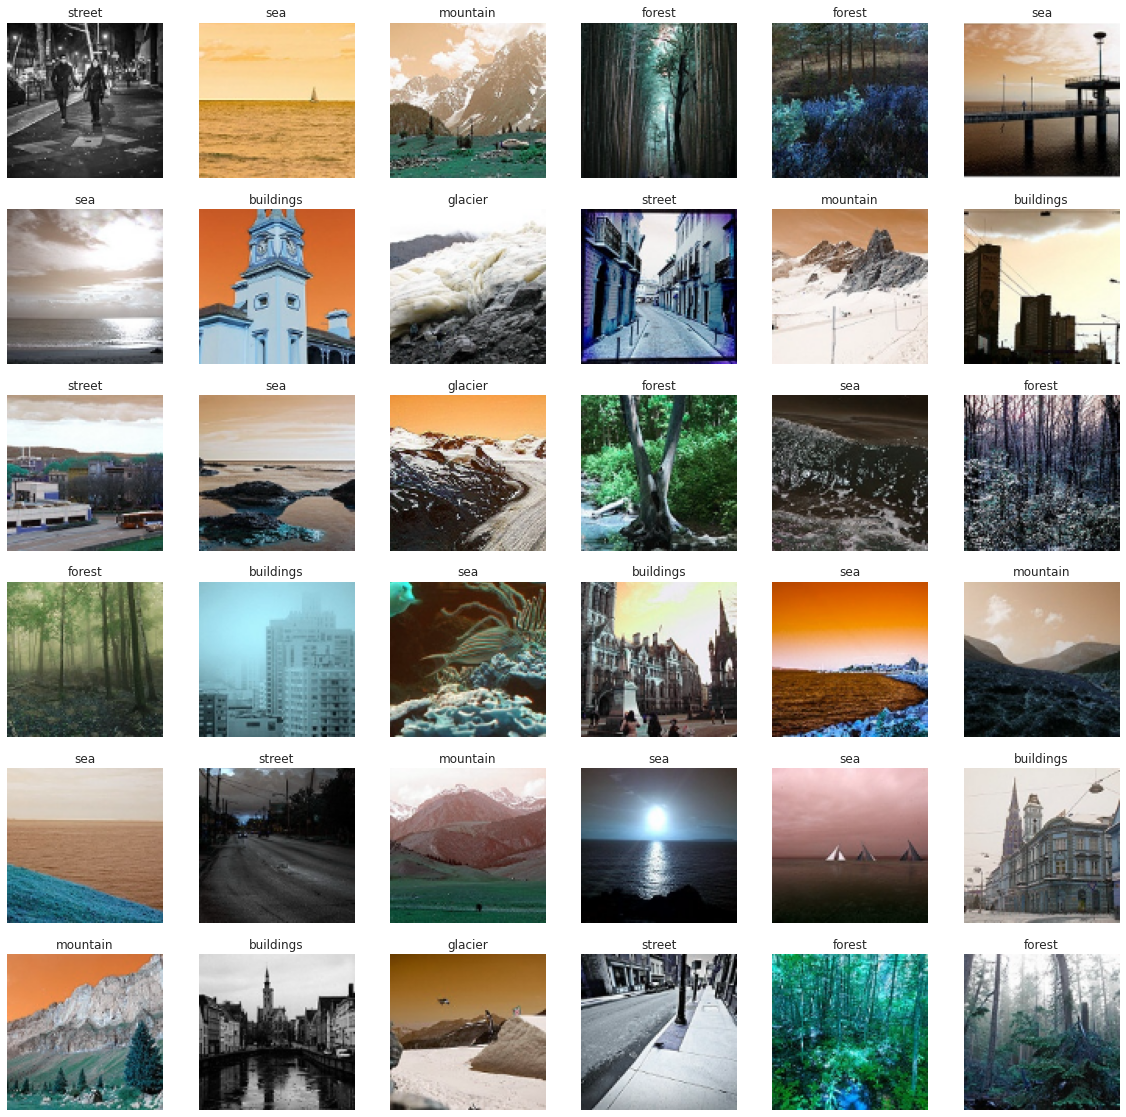

In [12]:
#showing training images with labels
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_train),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_train[i])   
    plt.axis('off')
    classes = {'buildings':0 ,'forest':1,'glacier':2,'mountain':3,'sea':4,'street':5}
    def get_img_class(n):
        for x , y in classes.items():
            if n == y :
                return x
    plt.title(get_img_class(y_train[i]))

In [13]:
#resize each image in all folders for Test Data
#identifing new size as 100 
#converting images to an array as X_test and and making a labeling array for it as y_test
new_size=100    
X_test = []
y_test = []
for folder in  os.listdir(testpath +'seg_test') : 
    files = gb.glob(pathname= str( testpath +'seg_test//' + folder + '/*.jpg'))
    for file in files: 
        image_class = {'buildings':0 ,'forest':1,'glacier':2,'mountain':3,'sea':4,'street':5}
        orignal_image = cv2.imread(file)
        resized_image = cv2.resize(orignal_image , (new_size,new_size))
        X_test.append(list(resized_image))
        y_test.append(image_class[folder])

In [14]:
#check items in X_test
print("items in X_test is:       ",len(X_test) , " items")

items in X_test is:        3000  items


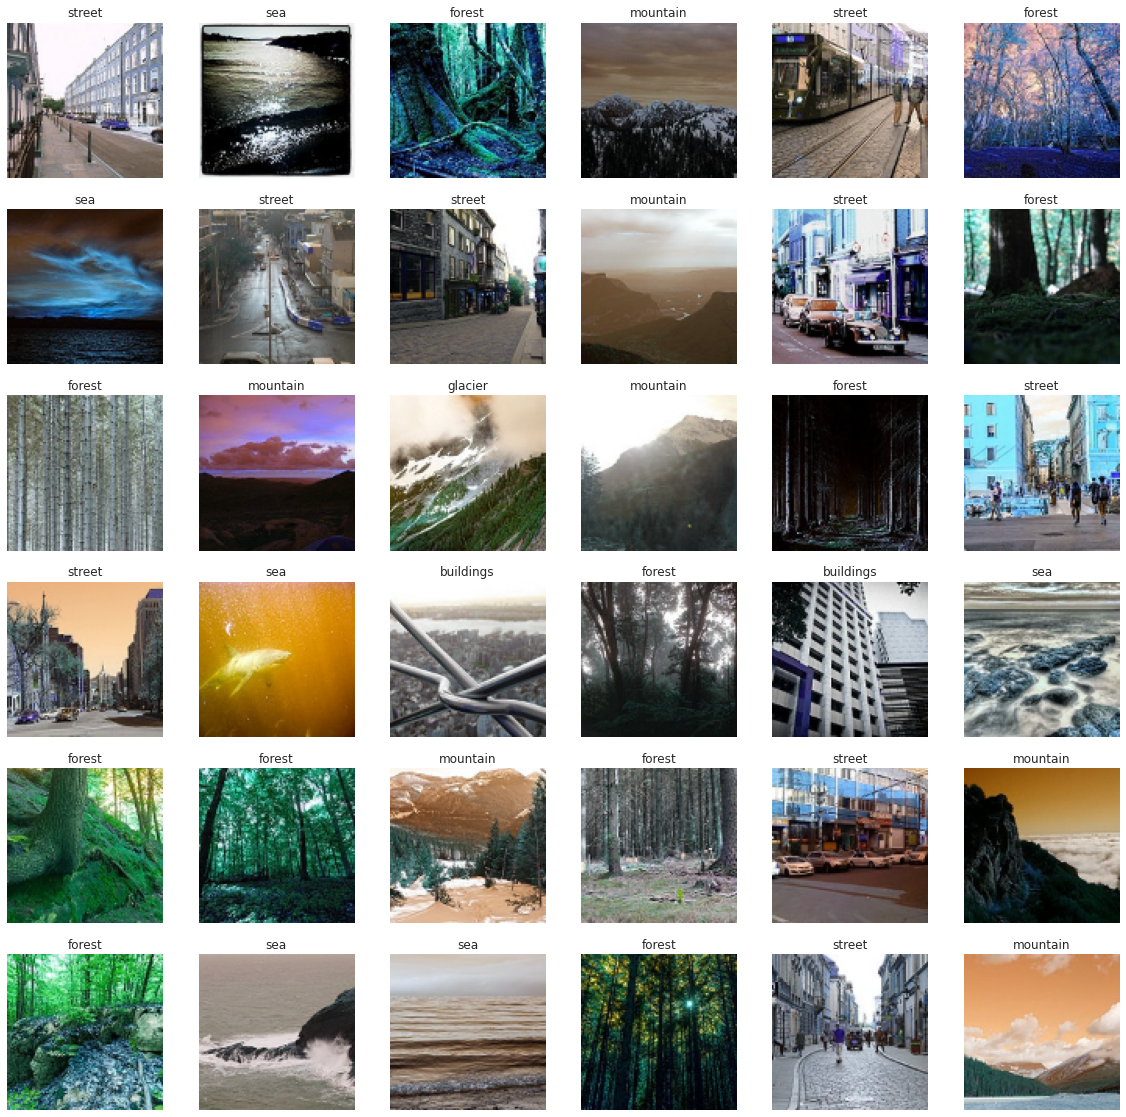

In [15]:
#showing test images with labels
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_test),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_test[i])   
    plt.axis('off')
    classes = {'buildings':0 ,'forest':1,'glacier':2,'mountain':3,'sea':4,'street':5}
    def get_img_class(n):
        for x , y in classes.items():
            if n == y :
                return x
    plt.title(get_img_class(y_test[i]))

In [16]:
#resize each image in all folders for prediction Data
#identifing new size as 100 
#converting images to an array as X_pred
new_size=100    
X_pred = []
for folder in  os.listdir(predpath) : 
    files = gb.glob(pathname= str( predpath + folder + '/*.jpg'))
    for file in files: 
        image_class = {'buildings':0 ,'forest':1,'glacier':2,'mountain':3,'sea':4,'street':5}
        orignal_image = cv2.imread(file)
        resized_image = cv2.resize(orignal_image , (new_size,new_size))
        X_pred.append(list(resized_image))

In [17]:
#check items in X_pred
print("items in X_pred is:       ",len(X_pred) , " items")

items in X_pred is:        7301  items


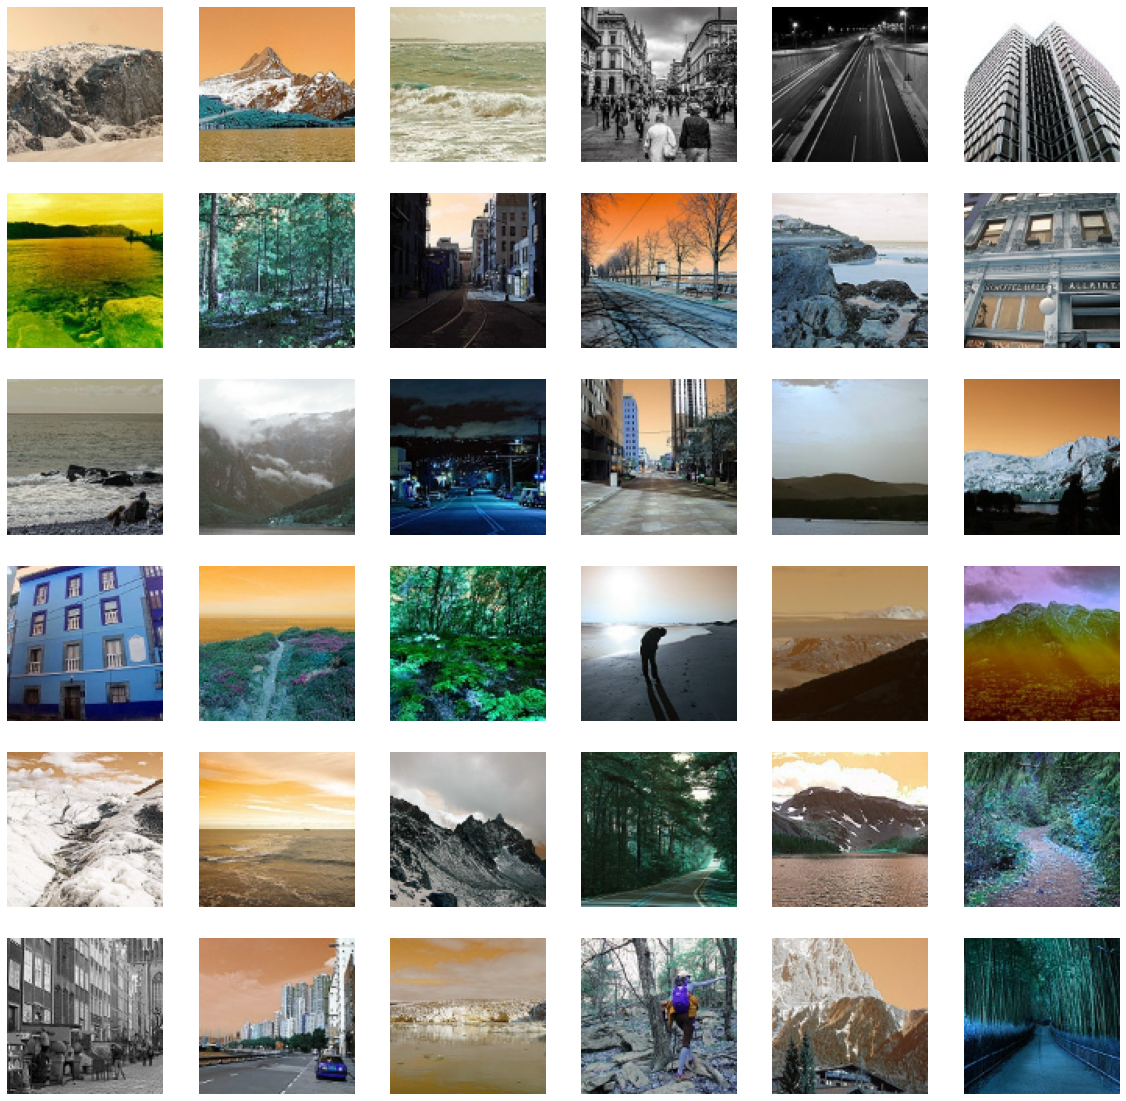

In [18]:
#showing some prediction images
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_pred),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_pred[i])   
    plt.axis('off')

In [31]:
#converting all data to array
X_train = np.array(X_train)
X_test = np.array(X_test)
X_Pred = np.array(X_pred)
y_train = np.array(y_train)
y_test = np.array(y_test)
print("X_train shape  : ",X_train.shape)
print("X_test shape  :" ,X_test.shape)
print("X_Pred shape :" , X_Pred.shape)
print("y_train shape :" ,y_train.shape)
print("y_test shape :", y_test.shape)

X_train shape  :  (14034, 100, 100, 3)
X_test shape  : (3000, 100, 100, 3)
X_Pred shape : (7301, 100, 100, 3)
y_train shape : (14034,)
y_test shape : (3000,)


building the CNN model using Keras 
we will make Conv2D layers , MaxPooling & Denses

In [32]:

Classification_Model_Keras = keras.models.Sequential([
        keras.layers.Conv2D(256,kernel_size=(3,3),activation='relu',input_shape=(new_size,new_size,3)),
        keras.layers.Conv2D(128,kernel_size=(3,3),activation='relu'),
        keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
        keras.layers.MaxPool2D(4,4),
        keras.layers.Conv2D(128,kernel_size=(3,3),activation='relu'),    
        keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'),    
        keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu'),
        keras.layers.MaxPool2D(4,4),
        keras.layers.Flatten() ,    
        keras.layers.Dense(128,activation='relu') ,    
        keras.layers.Dense(64,activation='relu') ,    
        keras.layers.Dense(32,activation='relu') ,        
        keras.layers.Dropout(rate=0.5) ,            
        keras.layers.Dense(6,activation='softmax') ,    
        ])

for compling Model:
we will use adam optimizer
sparse categorical crossentropy loss as we have 6 output



In [33]:
Classification_Model_Keras.compile(optimizer ='adam',
                                   loss='sparse_categorical_crossentropy',
                                   metrics=['accuracy'])

Model summary 

In [34]:
print('Model Summary: ')
print(Classification_Model_Keras.summary())

Model Summary: 
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 98, 98, 256)       7168      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 96, 96, 128)       295040    
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 94, 94, 64)        73792     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 21, 21, 128)       73856     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 19, 19, 64)        73792     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 17

train the model 
we will  use 40 epochs

In [35]:
epochs = 40
KerasModel = Classification_Model_Keras.fit(X_train, y_train, epochs=epochs,batch_size=64,verbose=1)


Epoch 1/40
220/220 [==============================] - 23s 107ms/step - loss: 1.8330 - accuracy: 0.1846
Epoch 2/40
220/220 [==============================] - 23s 106ms/step - loss: 1.7141 - accuracy: 0.2559
Epoch 3/40
220/220 [==============================] - 23s 105ms/step - loss: 1.3124 - accuracy: 0.4129
Epoch 4/40
220/220 [==============================] - 23s 105ms/step - loss: 1.1725 - accuracy: 0.4860
Epoch 5/40
220/220 [==============================] - 23s 105ms/step - loss: 1.1029 - accuracy: 0.5310
Epoch 6/40
220/220 [==============================] - 23s 105ms/step - loss: 1.0313 - accuracy: 0.5715
Epoch 7/40
220/220 [==============================] - 23s 106ms/step - loss: 0.9925 - accuracy: 0.5938
Epoch 8/40
220/220 [==============================] - 23s 105ms/step - loss: 0.9461 - accuracy: 0.6214
Epoch 9/40
220/220 [==============================] - 23s 105ms/step - loss: 0.8853 - accuracy: 0.6625
Epoch 10/40
220/220 [==============================] - 23s 105ms/step - l

final loss & accuracy

In [37]:
val_Loss, val_Acc = Classification_Model_Keras.evaluate(X_test, y_test)

print('Test Loss:', val_Loss)
print('Test Accuracy :', val_Acc)

94/94 [==============================] - 2s 16ms/step - loss: 0.9482 - accuracy: 0.8053
Test Loss: 0.9482426047325134
Test Accuracy : 0.8053333163261414


predicting Categories of X_test

In [38]:
y_test_pred = Classification_Model_Keras.predict(X_test)

print('y_test_pred Shape :',y_test_pred.shape)

y_test_pred Shape : (3000, 6)


Categories Prediction (y_pred) of X_Pred

In [39]:
y_pred = Classification_Model_Keras.predict(X_Pred)

print('Prediction Shape for y_result : ',y_pred.shape)

Prediction Shape for y_result :  (7301, 6)


 showing some random images from the predicted images and its predicting category

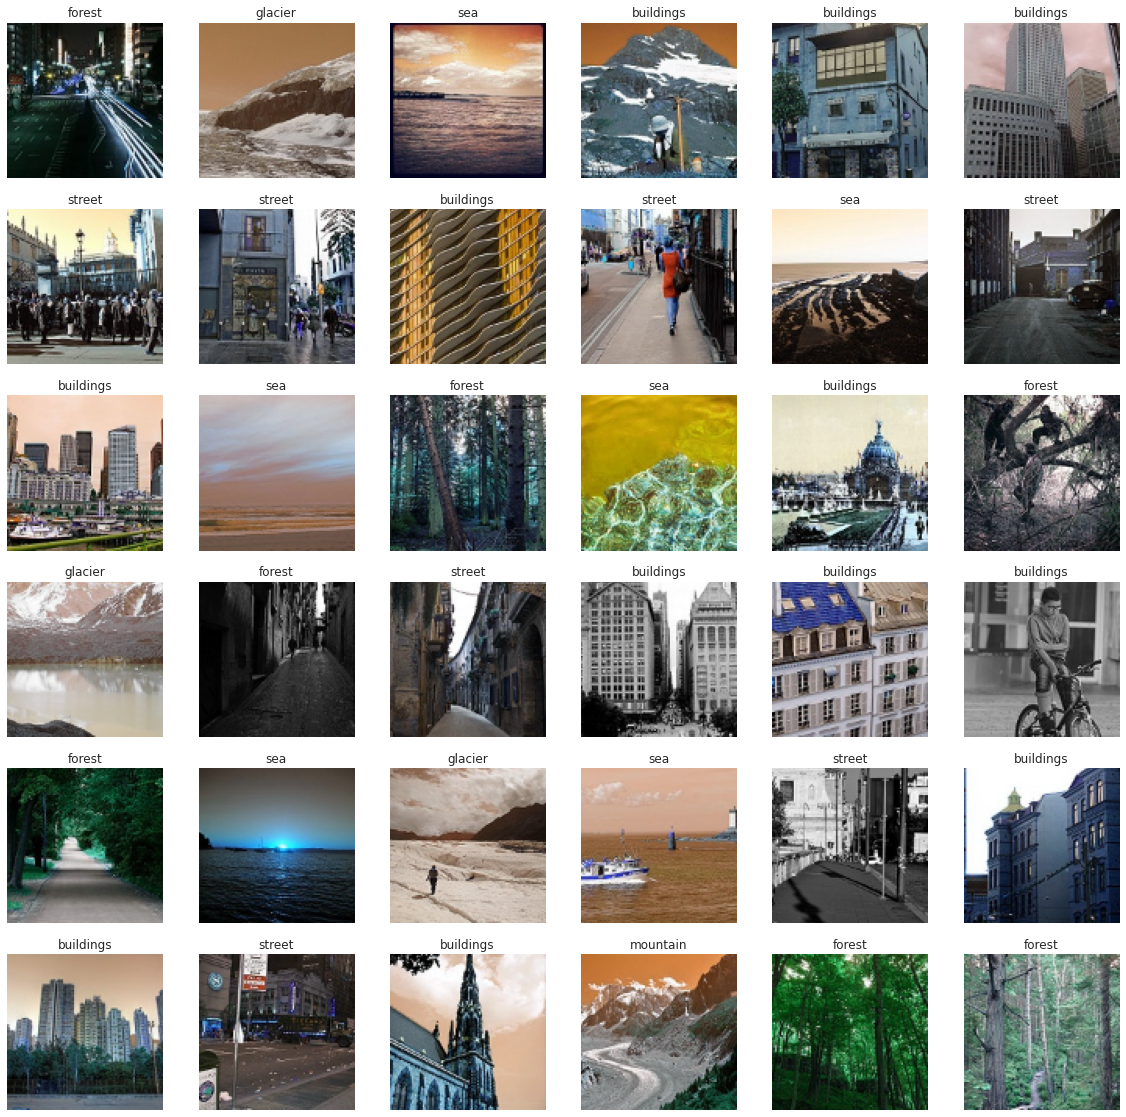

In [40]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_pred),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_pred[i])    
    plt.axis('off')
    classes = {'buildings':0 ,'forest':1,'glacier':2,'mountain':3,'sea':4,'street':5}
    def get_img_class(n):
        for x , y in classes.items():
            if n == y :
                return x
    plt.title(get_img_class(np.argmax(y_pred[i])))